In [51]:
import pandas as pd
import sys
import numpy as np
from pandas import DataFrame
from sklearn.model_selection import train_test_split, KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns

from scipy.stats.stats import pearsonr
from math import sqrt
import statistics 
from scipy.stats import *
from scipy.spatial import distance

############################################################
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from matplotlib.colors import ListedColormap
from matplotlib import cm
import geopandas as gpd

import numpy.ma as ma
import math

print("Repositories uploaded!!")

Repositories uploaded!!


<ipython-input-51-57240512e39e>:17: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


In [13]:
df_BUS = pd.read_csv("US_data/BigUS/largeUS_pred.csv")

In [14]:
df_BUS = df_BUS[['day', 'month', 'cmaq_x', 'cmaq_y', 'cmaq_id', 'rid', 'elev', 'forest_cover', 'pd', 'local', 'limi', 'high', 'is', 'nldas_pevapsfc', 
                 'nldas_pressfc', 'nldas_cape', 'nldas_ugrd10m', 'nldas_vgrd10m', 'nldas_tmp2m', 'nldas_rh2m', 'nldas_dlwrfsfc', 'nldas_dswrfsfc', 
                 'nldas_pcpsfc', 'nldas_fpcsfc', 'gc_aod', 'aod_value', 'emissi11_pm25', 'pm25_value_k', 'pm25_value']]

In [15]:
df_BUS.shape

(19639555, 29)

In [16]:
df_BUS

,day,month,cmaq_x,cmaq_y,cmaq_id,rid,elev,forest_cover,pd,local,...,nldas_rh2m,nldas_dlwrfsfc,nldas_dswrfsfc,nldas_pcpsfc,nldas_fpcsfc,gc_aod,aod_value,emissi11_pm25,pm25_value_k,pm25_value
0,1,1.0,-1.546318e+05,3.231663e+05,19315,8,10.23680,0.039216,1467.688772,831.897438,...,57.6797,346.759,459.2450,0.000000,0.000000,0.042317,NaN,0.0,7.278867,NaN
1,1,1.0,-1.427332e+05,3.230424e+05,19316,8,4.38882,0.007346,28.482678,1634.444946,...,61.8676,344.114,469.8650,0.000000,0.000000,0.042317,NaN,0.0,7.111352,NaN
2,1,1.0,-1.783152e+05,3.350347e+05,19757,8,17.82310,0.106520,78.112708,306.127464,...,53.1517,349.999,421.7750,0.000000,0.000000,0.023270,NaN,0.0,7.721335,NaN
3,1,1.0,-1.664153e+05,3.349110e+05,19758,8,12.61300,0.047750,131.643788,0.000000,...,55.8150,347.591,431.2840,0.000000,0.000000,0.042317,NaN,0.0,7.491351,NaN
4,1,1.0,-1.545156e+05,3.347886e+05,19759,8,8.23616,0.211230,125.791621,1009.069365,...,58.7535,344.800,455.8230,0.000000,0.000000,0.042317,NaN,0.0,7.282235,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19639550,365,12.0,-1.949187e+06,3.151649e+06,123504,1,20.80090,0.038567,33.702165,1318.192756,...,75.1704,302.600,68.1754,0.066786,0.091057,0.028647,NaN,0.0,11.660047,NaN
19639551,365,12.0,-1.937151e+06,3.151584e+06,123505,1,14.53420,0.037649,71.225454,0.000000,...,78.9498,301.263,65.6451,0.076071,0.087029,0.028647,NaN,0.0,11.575479,NaN
19639552,365,12.0,-1.925112e+06,3.151519e+06,123506,1,20.15010,0.047237,43.854214,0.000000,...,82.0332,300.424,74.6600,0.059429,0.095200,0.024560,NaN,0.0,11.489751,NaN
19639553,365,12.0,-1.913073e+06,3.151452e+06,123507,1,181.00500,0.853806,1.818150,0.000000,...,84.7600,289.849,83.5857,0.039329,0.116014,0.024560,NaN,0.0,11.403044,NaN


In [17]:
df_BUS.to_csv("US_data/BigUS/largeUS_subcol_pred.csv.gz", compression='gzip')

In [18]:
df_BUS[['cmaq_x', 'cmaq_y', 'cmaq_id']].to_csv("US_data/BigUS/largeUS_coords_pred.csv")

In [10]:
##### w/o standardization
df_BUS_monitoring = df_BUS[df_BUS.pm25_value.notnull()]
df_BUS_monitoring = df_BUS_monitoring.reset_index(drop = True)

df_BUS_predictions = df_BUS[~df_BUS.pm25_value.notnull()]
df_BUS_predictions = df_BUS_predictions.reset_index(drop = True)

df_BUS_monitoring.shape, df_BUS_predictions.shape

((249129, 78), (19390426, 78))

In [11]:
df_BUS_monitoring.to_csv("US_data/BigUS/us_monitoring.csv", index=False)

In [29]:
df_BUS_monitoring['day'].value_counts().mean()

682.5452054794521

<AxesSubplot:>

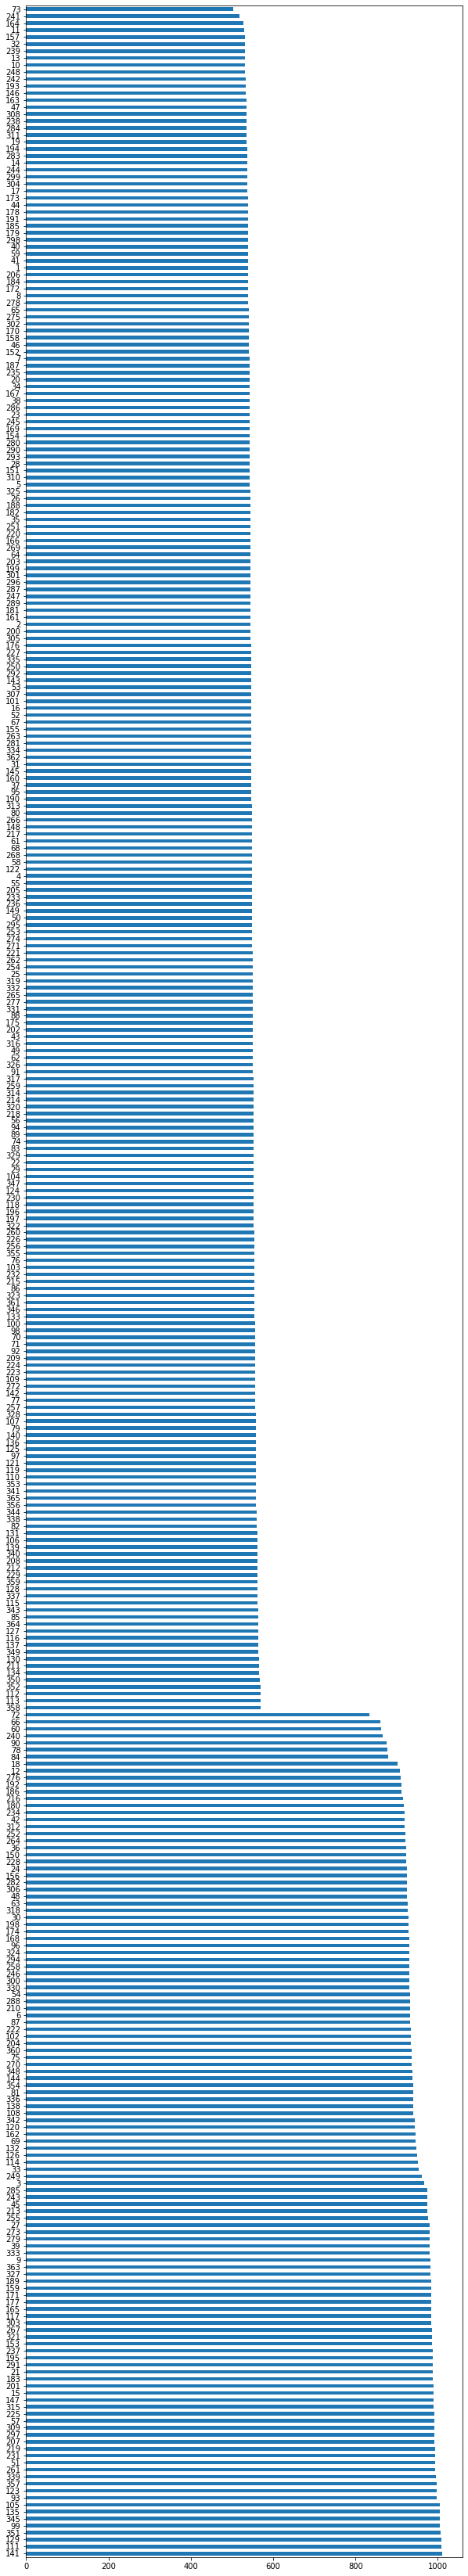

In [21]:
plt.figure(figsize = (10,60))
df_BUS_monitoring['day'].value_counts().plot(kind = 'barh')

In [39]:
import rasterio as rt

rast_data = rt.open('US_data/BigUS/test.tif')

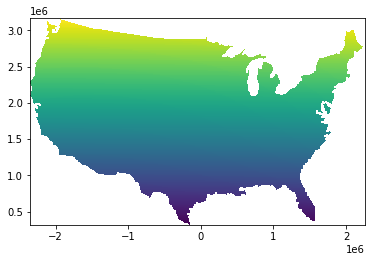

<AxesSubplot:>

In [40]:
from rasterio.plot import show, show_hist
show(rast_data)

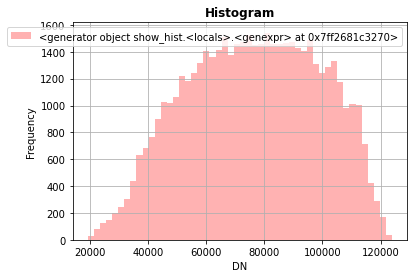

In [41]:
show_hist(rast_data, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="Histogram")

In [43]:
rast_us = rast_data.read(1)
rast_us[rast_us == rast_data.nodata] = 0 #### all locations where there is no data, make it as 0.

In [55]:
print(rast_us.shape)

(228, 369)


<AxesSubplot:>

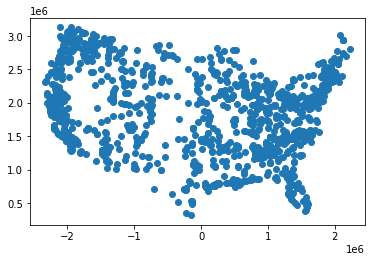

In [19]:
import geopandas as gpd

shpfile_pm = gpd.read_file("US_data/BigUS/GIS_data/pm_cmaq.shp")
shpfile_pm.plot()

In [20]:
shpfile_pm

,FID_1,pm_id,Latitude,Longitude,POINT_X,POINT_Y,FID_2,Id,Input_FID,AreaKm,Area,geometry
0,18,01-101-1002,32.4071,-86.2564,9.100635e+05,1.083851e+06,246,0,48263,143.958887,143958887,POINT (910063.499 1083850.565)
1,11,01-073-2006,33.3864,-86.8167,8.473559e+05,1.187402e+06,292,0,52254,143.988532,143988532,POINT (847355.872 1187402.426)
2,155,06-065-9001,33.6765,-117.3310,-1.947585e+06,1.398328e+06,331,0,59124,143.987525,143987525,POINT (-1947584.582 1398328.474)
3,104,06-029-0014,35.3561,-119.0412,-2.055683e+06,1.617083e+06,397,0,67107,144.050907,144050907,POINT (-2055683.328 1617082.680)
4,126,06-039-0500,37.2136,-119.6991,-2.061831e+06,1.833118e+06,471,0,75099,144.117757,144117757,POINT (-2061830.742 1833118.240)
...,...,...,...,...,...,...,...,...,...,...,...,...
1243,1137,53-031-0003,48.1292,-122.7790,-1.984465e+06,3.073868e+06,0,0,0,0.000000,0,POINT (-1984465.090 3073868.031)
1244,1141,53-033-0048,47.6153,-122.3300,-1.967563e+06,3.010034e+06,0,0,0,0.000000,0,POINT (-1967563.382 3010034.248)
1245,1142,53-033-0057,47.5598,-122.3383,-1.969845e+06,3.004311e+06,0,0,0,0.000000,0,POINT (-1969844.747 3004310.614)
1246,1143,53-033-0080,47.5682,-122.3086,-1.967427e+06,3.004588e+06,0,0,0,0.000000,0,POINT (-1967426.979 3004587.777)


In [56]:
N = 5
N_ = int(N/2)

for day in range(2):
    print(day)
    df_BUS_pd_1 = df_BUS_predictions[df_BUS_predictions['day'] == day]
    df_BUS_pd_1 = df_BUS_pd_1.reset_index(drop = True)
    
    df_BUS_mn_1 = df_BUS_monitoring[df_BUS_monitoring['day'] == day]
    df_BUS_mn_1 = df_BUS_mn_1.reset_index(drop = True)
    
#     print(df_BUS_mn_1['cmaq_id'].unique())
    for idx, rowval in df_BUS_mn_1.iterrows(): ### iterate over each row
        for colname in df_BUS_mn_1: ###iterate over every column and for every column you create the cmaqgrid and then add corresponding column values           
            print(rowval['cmaq_id'])
            cmaqval = rowval['cmaq_id']
            row, col = np.where(rast_us == cmaqval) ### get (row,col) where cmaq_id value is same as raster pixel value.
            
            print(row, col)
#             if(len(row) != 0 and len(col) != 0): ## make sure the row,col values are not empty.
            cmaqgrid = np.array(rast_us[row[0] - N_:row[0]+(N_+1), col[0]- N_:col[0]+(N_+1)]) 
            print(cmaqgrid.shape)
            print("-----------------")


0
1
20641.0
[224] [169]
(5, 5)
-----------------
20641.0
[224] [169]
(5, 5)
-----------------
20641.0
[224] [169]
(5, 5)
-----------------
20641.0
[224] [169]
(5, 5)
-----------------
20641.0
[224] [169]
(5, 5)
-----------------
20641.0
[224] [169]
(5, 5)
-----------------
20641.0
[224] [169]
(5, 5)
-----------------
20641.0
[224] [169]
(5, 5)
-----------------
20641.0
[224] [169]
(5, 5)
-----------------
20641.0
[224] [169]
(5, 5)
-----------------
20641.0
[224] [169]
(5, 5)
-----------------
20641.0
[224] [169]
(5, 5)
-----------------
20641.0
[224] [169]
(5, 5)
-----------------
20641.0
[224] [169]
(5, 5)
-----------------
20641.0
[224] [169]
(5, 5)
-----------------
20641.0
[224] [169]
(5, 5)
-----------------
20641.0
[224] [169]
(5, 5)
-----------------
20641.0
[224] [169]
(5, 5)
-----------------
20641.0
[224] [169]
(5, 5)
-----------------
20641.0
[224] [169]
(5, 5)
-----------------
20641.0
[224] [169]
(5, 5)
-----------------
20641.0
[224] [169]
(5, 5)
-----------------
20641.

IndexError: index 0 is out of bounds for axis 0 with size 0

In [63]:
######################################## Using just the Big Dataset ########################################

N = 5
N_ = int(N/2)

key = 0
targetlist = []
traininglist = []
training_difflist = []

# fgrid = open('US_data/BigUS/grid3d.npy', 'ab+')

for day in range(1,366):
    print(day)
    df_BUS_pd_1 = df_BUS_predictions[df_BUS_predictions['day'] == day]
    df_BUS_pd_1 = df_BUS_pd_1.reset_index(drop = True)
    
    df_BUS_mn_1 = df_BUS_monitoring[df_BUS_monitoring['day'] == day]
    df_BUS_mn_1 = df_BUS_mn_1.reset_index(drop = True)
    
    for idx, rowval in df_BUS_mn_1.iterrows(): ### iterate over each row
        featarr = np.ones((5, 5))
        feat_diffdict = {}
        idx_ = 0
        count = 0
        
        cmaqval = rowval['cmaq_id']
        row, col = np.where(rast_us == cmaqval) ### get (row,col) where cmaq_id value is same as raster pixel value.  IF_STATEMENT_1
        if(len(row) != 0 and len(col) != 0): ## make sure the row,col values are not empty.
            ## create a grid which has 5x5 cmaq_ids from the raster file, 
            ## with the center pixel as monitoring station cmaq_id and remaining. 
            cmaqgrid = np.array(rast_us[row[0] - N_:row[0]+(N_+1), col[0]- N_:col[0]+(N_+1)]) 
            
            if cmaqgrid.shape[0] == 5 and cmaqgrid.shape[1] == 5: ### What if this is not true?? <----- Look into this Shrey.   IF_STATEMENT_2
                for colname in df_BUS_mn_1: ###iterate over every column and for every column you create the cmaqgrid and then add corresponding column values           
                    if colname == 'cmaq_id': ##or colname == 'cmaq_x' or colname == 'cmaq_y' or colname == 'day' or colname == 'month' or colname == 'rid'
                        continue
                    elif colname == 'pm25_value':
                        targetval = rowval['pm25_value']
                        continue
                    else:
                        idx_ = idx_ + 1
                        count = count + 1
                        temparr = np.ones((5, 5))
                        for i in range(5): ## Add values element-wise 
                            for j in range(5):
                                if i == 2 and j == 2: 
                                    temparr[i,j] = rowval[colname]                               

                                else:
                                    match_cmaq = cmaqgrid[i,j]
                                    if match_cmaq == 0: ## compare this to 0 || previously: if np.isnan(match_cmaq): 
                                        temparr[i,j] = math.nan   ##match_cmaq

                                    else:
                                        locval_df = df_BUS_pd_1[df_BUS_pd_1['cmaq_id'] == match_cmaq]
                                        locval = locval_df[colname]
                                        if len(locval) == 0: ### If no cmaq_id matches are found
                                            locval = math.nan ##assigning the column value at the location as nan (previously 0.0)
                                        
                                        temparr[i,j] = locval

                    ##making sure empty values are averaged.
                    temparr = np.where(np.isnan(temparr), ma.array(temparr, mask=np.isnan(temparr)).mean(axis=0), temparr) 
                    featarr = np.dstack((featarr,temparr))

                                    
            else: ##### ELSE_STATEMENT_2
                continue
            
        else: ##### ELSE_STATEMENT_1
            continue

                        
        featarr = np.dstack((featarr,temparr))
#         print("No. of features added: ",count)
        
        if featarr.shape[0] == 5 and featarr.shape[1] == 5 and featarr.shape[2] == 29: 
#             print("Adding!")
#             print(featarr.shape)
            featarr = np.delete(featarr, (0), axis = 2) ##delete first
            featarr = np.delete(featarr, (27), axis = 2) ##delete the last which is an extra addition.
            print(featarr.shape)
#             print(featarr)
            
            targetlist.append(targetval)
            traininglist.append(featarr)
        print("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")
        
########################################## Notes ##########################################
##### There are 2 types of NAN values: (1) Generated by 


1
(5, 5, 27)
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
(5, 5, 27)
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
(5, 5, 27)
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
(5, 5, 27)
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
(5, 5, 27)
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
(5, 5, 27)
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
(5, 5, 27)
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
(5, 5, 27)
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
(5, 5, 27)
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
(5, 5, 27)
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
(5, 5, 27)
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
(5, 5, 27)
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

KeyboardInterrupt: 

In [65]:
################### Load Local Files ###################
with open('training_grid_v3.npy', 'rb') as f1:
    x_tr = np.load(f1)

with open('target_grid_v3.npy', 'rb') as f2:
    y_tr = np.load(f2)

In [66]:
x_tr.shape

(502, 5, 5, 27)

In [20]:
us2018 = pd.read_csv("US_data/US_2018/US.csv")

In [28]:
us2018

,ID,Date,PM25,X,Y,Region,Lon,Lat,Hour,CF_CLDTT,...,LC_Water,LC_Wetland,LC_Lichen,LC_Closed_Forest,LC_Open_Forest,LC_Ocean,Elevation,Dist_Primary,Dist_Secondary,Pop
0,468518,2018-01-02,1.400000,1.567567e+06,-1.382348e+06,Florida,-80.682187,25.390882,12,0.822249,...,0.0,0.15,0,0.0,0.00,0.0,1,345375.639808,351276.487109,4.000000
1,468518,2018-01-05,7.300000,1.567567e+06,-1.382348e+06,Florida,-80.682187,25.390882,12,0.159620,...,0.0,0.15,0,0.0,0.00,0.0,1,345375.639808,351276.487109,4.000000
2,468518,2018-01-08,3.500000,1.567567e+06,-1.382348e+06,Florida,-80.682187,25.390882,12,0.913732,...,0.0,0.15,0,0.0,0.00,0.0,1,345375.639808,351276.487109,4.000000
3,468518,2018-01-11,2.100000,1.567567e+06,-1.382348e+06,Florida,-80.682187,25.390882,12,0.021333,...,0.0,0.15,0,0.0,0.00,0.0,1,345375.639808,351276.487109,4.000000
4,468518,2018-01-14,5.100000,1.567567e+06,-1.382348e+06,Florida,-80.682187,25.390882,12,0.631767,...,0.0,0.15,0,0.0,0.00,0.0,1,345375.639808,351276.487109,4.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
694181,17211707,2019-12-27,3.916667,-1.936102e+06,1.367174e+06,Washington,-122.453848,48.756062,12,0.994987,...,0.0,0.00,0,0.0,0.17,0.0,55,1812.713641,1048.631404,1049.833333
694182,17211707,2019-12-28,5.916667,-1.936102e+06,1.367174e+06,Washington,-122.453848,48.756062,12,0.989416,...,0.0,0.00,0,0.0,0.17,0.0,55,1812.713641,1048.631404,1049.833333
694183,17211707,2019-12-29,3.791667,-1.936102e+06,1.367174e+06,Washington,-122.453848,48.756062,12,0.958669,...,0.0,0.00,0,0.0,0.17,0.0,55,1812.713641,1048.631404,1049.833333
694184,17211707,2019-12-30,4.450000,-1.936102e+06,1.367174e+06,Washington,-122.453848,48.756062,12,0.965298,...,0.0,0.00,0,0.0,0.17,0.0,55,1812.713641,1048.631404,1049.833333


<AxesSubplot:>

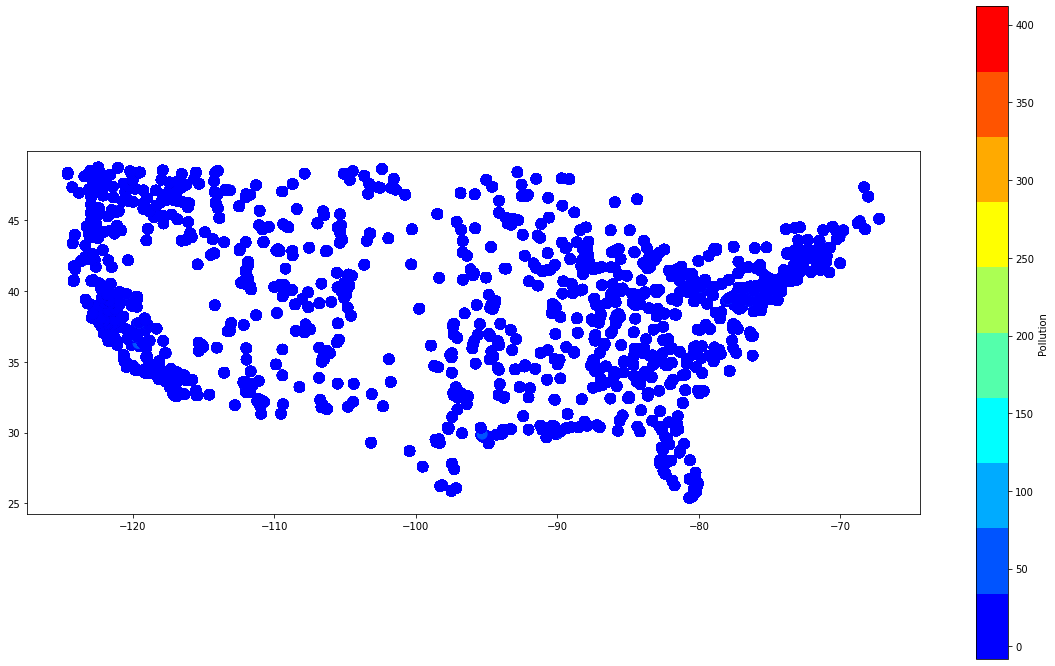

In [27]:
from matplotlib.colors import ListedColormap
from matplotlib import cm
import geopandas as gpd

us2018_df = us2018[['Lon', 'Lat', 'PM25']].copy()
us2018_df = us2018_df.reset_index(drop = True)

fig, axs = plt.subplots(figsize = (20, 20))

rainbow_colors = ListedColormap(['#0000ff', '#0054ff', '#00abff', '#00ffff', '#54ffab', '#abff53', '#ffff00', '#ffaa00', '#ff5400', '#ff0000']) #Using VIBGYOR for colors
us2018_map = gpd.GeoDataFrame(us2018_df, geometry = gpd.points_from_xy(us2018_df.Lon, us2018_df.Lat)) #Create a geodataframe
us2018_map.plot(column = 'PM25', ax = axs, cmap = rainbow_colors, legend = True, legend_kwds = {'label': "Pollution", 'shrink': 0.6}, markersize = 100)


In [ ]:
############################################# Basic LSTM model #############################################

In [6]:
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

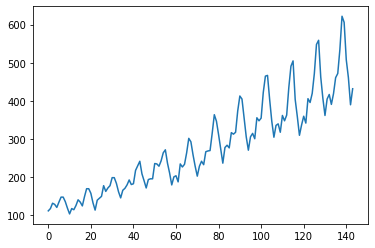

In [31]:
airline_df = pd.read_csv('Test_data/airline-passengers.csv', usecols=[1])
plt.plot(airline_df)
plt.show()

In [32]:
# load the dataset
dataset = airline_df.values
dataset = dataset.astype('float32')

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

96 48


In [33]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [34]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [35]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [36]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(40, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
94/94 - 1s - loss: 0.0164 - 945ms/epoch - 10ms/step
Epoch 2/100
94/94 - 0s - loss: 0.0095 - 77ms/epoch - 818us/step
Epoch 3/100
94/94 - 0s - loss: 0.0071 - 76ms/epoch - 810us/step
Epoch 4/100
94/94 - 0s - loss: 0.0053 - 80ms/epoch - 856us/step
Epoch 5/100
94/94 - 0s - loss: 0.0036 - 77ms/epoch - 822us/step
Epoch 6/100
94/94 - 0s - loss: 0.0029 - 78ms/epoch - 827us/step
Epoch 7/100
94/94 - 0s - loss: 0.0023 - 77ms/epoch - 816us/step
Epoch 8/100
94/94 - 0s - loss: 0.0022 - 78ms/epoch - 828us/step
Epoch 9/100
94/94 - 0s - loss: 0.0021 - 81ms/epoch - 867us/step
Epoch 10/100
94/94 - 0s - loss: 0.0021 - 78ms/epoch - 835us/step
Epoch 11/100
94/94 - 0s - loss: 0.0021 - 77ms/epoch - 815us/step
Epoch 12/100
94/94 - 0s - loss: 0.0022 - 77ms/epoch - 818us/step
Epoch 13/100
94/94 - 0s - loss: 0.0023 - 76ms/epoch - 813us/step
Epoch 14/100
94/94 - 0s - loss: 0.0021 - 81ms/epoch - 861us/step
Epoch 15/100
94/94 - 0s - loss: 0.0020 - 81ms/epoch - 866us/step
Epoch 16/100
94/94 - 0s - loss: 0.

In [37]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

2/2 [==============================] - 0s 2ms/step
Train Score: 22.73 RMSE
Test Score: 49.05 RMSE


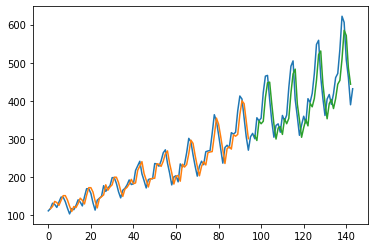

In [38]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [40]:
x_target = np.load("US_data/us-2011/tl-cal-5/split-5/target_cal.npy")
y_target = np.load("US_data/us-2011/tl-cal-5/split-5/target_cal_label.npy")

x_test = np.load("US_data/us-2011/tl-cal-5/split-5/test_cal.npy")
y_test = np.load("US_data/us-2011/tl-cal-5/split-5/test_cal_label.npy")

x_target.shape, y_target.shape, x_test.shape, y_test.shape    

((688, 700), (688,), (26970, 700), (26970,))

In [44]:
x_target = x_target.reshape(len(x_target), 5, 5, 28)

In [55]:
x_target[1][1][1]

array([-2.24733227e+06,  2.46926549e+06,  7.00000000e+00,  2.01000000e+02,
        1.25264000e+03,  0.00000000e+00,  9.81710000e+04,  9.33155000e-01,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.99643494e-01,
        3.58816999e+00,  1.00000000e+00,  5.69557000e-01,  2.99036000e+02,
        7.27898000e+02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        7.34836000e+01,  2.87764000e+02, -2.91143000e+00, -8.25714000e-01,
        9.03196000e+04,  6.50333330e-03,  1.25500000e-01,  2.56078143e+00])

In [64]:
cmaq_ids = np.load("US_data/split-data/single/tl-cal-10/split-1/target_cmaq.npz")
source_cmaq = np.load("US_data/split-data/single/source_cmaq.npy")

In [65]:
train_cmaq = cmaq_ids["train"]
test_cmaq = cmaq_ids["test"]

In [67]:
# train_cmaq, test_cmaq, source_cmaq

In [ ]:
############################################### Plots for the Paper ###############################################

In [62]:
monitoring_whole_data = pd.read_csv("US_data/BigUS/us_monitoring.csv")
monitoring_whole_data

,year,day,cmaq_x,cmaq_y,elev,emissi11_pm25,forest_cover,high,limi,local,...,narr_vgrd1815mb,narr_tmp30m,narr_pres2m,narr_pres10m,narr_pres30m,aod_value,pm25_value,gc_aod,pm25_value_k,month
0,2011,1,-2.256897e+05,3.587932e+05,35.77930,0.0,0.000000,0.000000,0.000000,873.759842,...,0.498815,294.425,101386.0,101282.0,101040.0,0.112333,8.6,0.021297,8.582339,1.0
1,2011,1,1.571739e+06,3.949590e+05,1.01104,0.0,0.000000,1050.015418,0.000000,807.793896,...,2.506630,298.217,101552.0,101482.0,101273.0,NaN,7.9,0.107923,7.383566,1.0
2,2011,1,-1.291484e+05,4.863733e+05,2.43082,0.0,0.000000,0.000000,0.000000,1009.915135,...,0.496211,293.508,101352.0,101282.0,101073.0,0.027000,5.9,0.022637,5.900033,1.0
3,2011,1,1.430635e+06,4.666680e+05,3.87558,0.0,0.000000,0.000000,2030.156665,0.000000,...,3.678500,295.279,97185.8,97082.1,96839.6,NaN,5.4,0.111803,7.488950,1.0
4,2011,1,1.573342e+06,4.646160e+05,3.35600,0.0,0.020202,0.000000,0.000000,2037.573293,...,3.912880,296.529,101586.0,101515.0,101273.0,NaN,10.2,0.100897,7.398404,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249124,2011,365,-1.900296e+06,3.057078e+06,595.92000,0.0,0.970588,0.000000,0.000000,0.000000,...,3.819380,290.432,100123.0,99985.6,99776.6,NaN,4.7,0.016803,10.765756,12.0
249125,2011,365,-1.791970e+06,3.056591e+06,758.28300,0.0,0.778547,0.000000,0.000000,0.000000,...,-0.599889,288.057,96756.0,96652.2,96410.0,NaN,9.9,0.007157,9.456686,12.0
249126,2011,365,-1.948693e+06,3.092715e+06,3.58333,0.0,0.004456,0.000000,0.000000,0.000000,...,1.504280,288.724,102023.0,101886.0,101677.0,NaN,3.9,0.032277,11.428495,12.0
249127,2011,365,-2.117447e+06,3.128790e+06,3.56685,0.0,0.100092,0.000000,0.000000,0.000000,...,1.819380,290.349,102189.0,102019.0,101843.0,NaN,2.7,0.018143,12.663332,12.0


In [63]:
len(monitoring_whole_data['cmaq_id'].unique())

1081

In [64]:
tag_names = ['day', 'month', 'cmaq_x', 'cmaq_y', 'cmaq_id', 'rid', 'elev', 'forest_cover', 'pd', 'local', 'limi', 'high', 'is',
    'nldas_pevapsfc','nldas_pressfc', 'nldas_cape', 'nldas_ugrd10m', 'nldas_vgrd10m', 'nldas_tmp2m', 'nldas_rh2m', 'nldas_dlwrfsfc',
    'nldas_dswrfsfc', 'nldas_pcpsfc', 'nldas_fpcsfc', 'gc_aod', 'aod_value', 'emissi11_pm25', 'pm25_value']

In [65]:
monitoring_data = pd.read_csv("US_data/BigUS/us_monitoring.csv")[tag_names]
monitoring_data

,day,month,cmaq_x,cmaq_y,cmaq_id,rid,elev,forest_cover,pd,local,...,nldas_tmp2m,nldas_rh2m,nldas_dlwrfsfc,nldas_dswrfsfc,nldas_pcpsfc,nldas_fpcsfc,gc_aod,aod_value,emissi11_pm25,pm25_value
0,1,1.0,-2.256897e+05,3.587932e+05,20641,8,35.77930,0.000000,1738.142952,873.759842,...,293.014,46.4560,361.171,363.8740,0.000000,0.000000,0.021297,0.112333,0.0,8.6
1,1,1.0,1.571739e+06,3.949590e+05,23012,9,1.01104,0.000000,49.834835,807.793896,...,297.414,73.5162,364.283,567.1650,0.000000,0.000000,0.107923,NaN,0.0,7.9
2,1,1.0,-1.291484e+05,4.863733e+05,25533,8,2.43082,0.000000,2.177096,1009.915135,...,290.363,59.1854,313.827,482.5620,0.000000,0.000000,0.022637,0.027000,0.0,5.9
3,1,1.0,1.430635e+06,4.666680e+05,25664,9,3.87558,0.000000,223.291218,0.000000,...,297.626,63.8325,355.794,540.0590,0.000000,0.000000,0.111803,NaN,0.0,5.4
4,1,1.0,1.573342e+06,4.646160e+05,25676,9,3.35600,0.020202,458.641023,2037.573293,...,297.703,67.4090,360.210,549.9930,0.000000,0.000000,0.100897,NaN,0.0,10.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249124,365,12.0,-1.900296e+06,3.057078e+06,119956,1,595.92000,0.970588,1.809363,0.000000,...,271.201,82.1681,273.349,85.9857,0.002386,0.000000,0.016803,NaN,0.0,4.7
249125,365,12.0,-1.791970e+06,3.056591e+06,119965,1,758.28300,0.778547,0.580178,0.000000,...,272.597,66.8160,241.386,126.5820,0.000557,0.000000,0.007157,NaN,0.0,9.9
249126,365,12.0,-1.948693e+06,3.092715e+06,121284,1,3.58333,0.004456,37.418241,0.000000,...,278.243,73.5161,299.983,84.3423,0.036857,0.238114,0.032277,NaN,0.0,3.9
249127,365,12.0,-2.117447e+06,3.128790e+06,122602,1,3.56685,0.100092,0.000000,0.000000,...,276.556,77.9469,288.923,118.1230,0.032857,0.064371,0.018143,NaN,0.0,2.7


In [66]:
monitoring_data.fillna(monitoring_data.mean(), inplace=True)

In [ ]:
###################### Density and histogram plots ############################

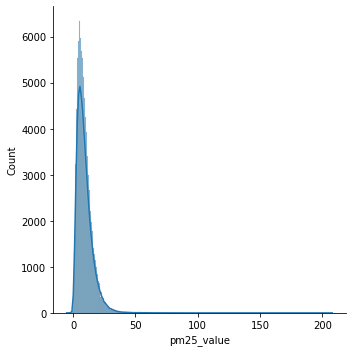

In [33]:
import matplotlib.pyplot as plt

# sns.displot(monitoring_data, x="pm25_value", kind="kde", bw_adjust = 0.25)
sns.displot(monitoring_data, x="pm25_value", kde=True)

# monitoring_data.hist(bins=30, figsize=(15, 10))

In [39]:
import proplot as pplt

fig, ax = pplt.subplots()

ax.plot(monitoring_data['pm25_value'], kind='density', lw=2)
pplt.show()

In [67]:
source_cmaq = np.load("/Users/shrey/Downloads/PM25/PM25-dnntransfer/US_data/split-data/single/source_cmaq.npy").tolist()
source_df = monitoring_data[monitoring_whole_data['cmaq_id'].isin(source_cmaq)]
source_df = source_df.reset_index()

cmaq_ids = np.load(f"/Users/shrey/Downloads/PM25/PM25-dnntransfer/US_data/split-data/single/tl-cal-10/split-5/target_cmaq.npz")

target_cmaq = cmaq_ids["train"].tolist()
target_df = monitoring_data[monitoring_whole_data['cmaq_id'].isin(target_cmaq)]
target_df = target_df.reset_index()


test_cmaq = cmaq_ids["test"].tolist()
test_df = monitoring_data[monitoring_whole_data['cmaq_id'].isin(test_cmaq)]
test_df = test_df.reset_index()

train_cmaq = target_cmaq + test_cmaq
train_df = monitoring_data[monitoring_whole_data['cmaq_id'].isin(train_cmaq)]
train_df = train_df.reset_index()

In [68]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
ss = MinMaxScaler()

monitoring_data[tag_names] =  ss.fit_transform(monitoring_data[tag_names])
source_df[tag_names] = ss.fit_transform(source_df[tag_names])
target_df[tag_names] = ss.fit_transform(target_df[tag_names])
test_df[tag_names] = ss.fit_transform(test_df[tag_names])
train_df[tag_names] = ss.fit_transform(train_df[tag_names])

/Users/shrey/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/shrey/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/shrey/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

[Text(0.5, 1.0, 'Target Dataset')]

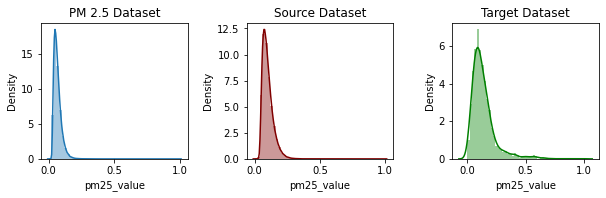

In [76]:
# fig, axes = plt.subplots(2, 2, figsize=(18, 10))

# sns.displot(monitoring_data, x = "pm25_value", kde=True, ax=axes[0, 0])
# sns.displot(source_df, x = "pm25_value", kde=True, ax=axes[0, 1])
# sns.displot(target_df, x = "pm25_value", kde=True, ax=axes[1, 0])
# sns.displot(test_df, x = "pm25_value", kde=True, ax=axes[1, 1])


fig = plt.figure(figsize = (10, 2.5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax = fig.add_subplot(1, 3, 1)
sns.distplot(monitoring_data.pm25_value, ax=ax).set(title = 'PM 2.5 Dataset')

ax = fig.add_subplot(1, 3, 2)
sns.distplot(source_df.pm25_value, ax=ax, color='maroon').set(title ='Source Dataset')

ax = fig.add_subplot(1, 3, 3)
sns.distplot(target_df.pm25_value, ax=ax, color='green').set(title ='Target Dataset')

# ax = fig.add_subplot(2, 2, 4)
# sns.distplot(test_df.pm25_value, ax=ax, color='grey').set(title ='Test Dataset')

In [ ]:
###################### Boxplot ############################

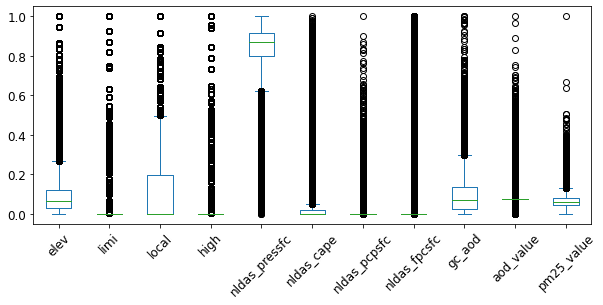

In [91]:
ax = monitoring_data[['elev', 'limi', 'local', 'high', 'nldas_pressfc', 'nldas_cape', 'nldas_pcpsfc', 'nldas_fpcsfc',
                      'gc_aod', 'aod_value', 'pm25_value']].plot(kind='box', fontsize = 12, rot = 45, figsize = (10, 4))
plt.show()

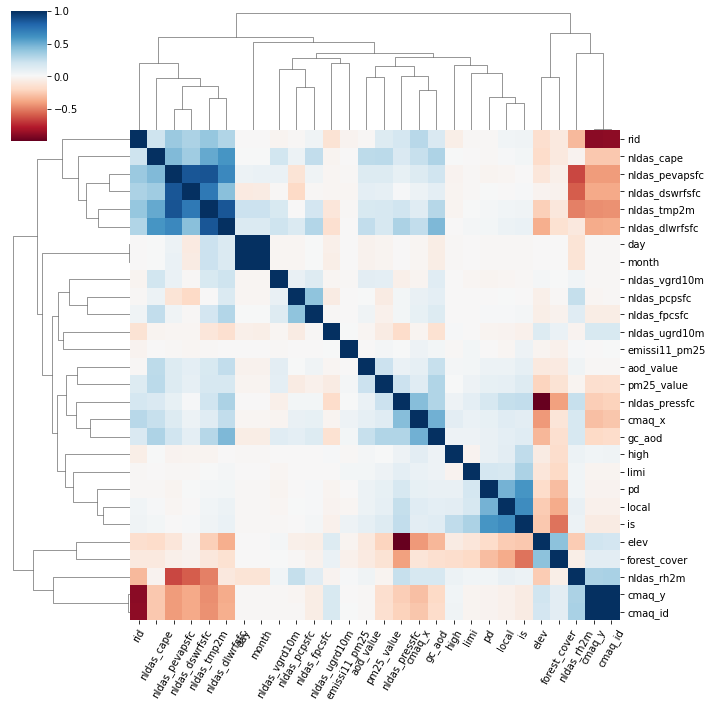

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

### method = 'complete',  annot  = False, annot_kws = {'size': 8}
map_correlation = sns.clustermap(monitoring_data.corr(), cmap = 'RdBu')
plt.setp(map_correlation.ax_heatmap.get_xticklabels(), rotation=60);

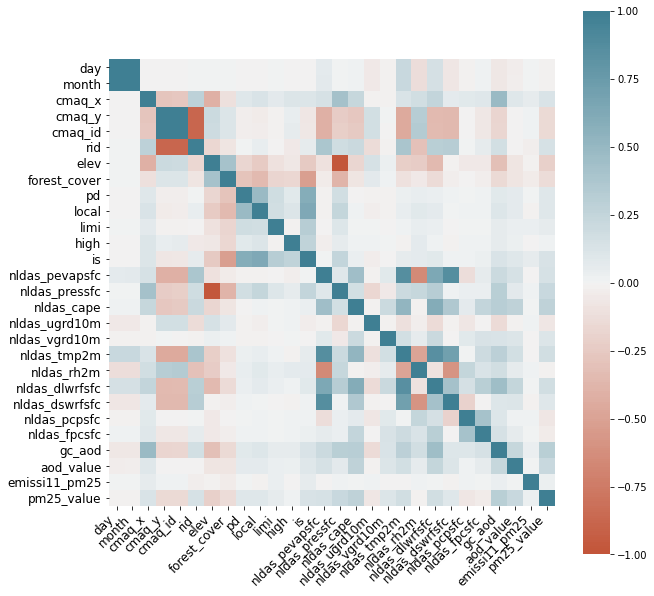

In [94]:
corr = monitoring_data.corr()

fig, axs = plt.subplots(figsize = (10, 10))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_yticklabels(
    ax.get_yticklabels(),
    fontsize = 12
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    fontsize = 12,
    rotation=45,
    horizontalalignment='right'
);

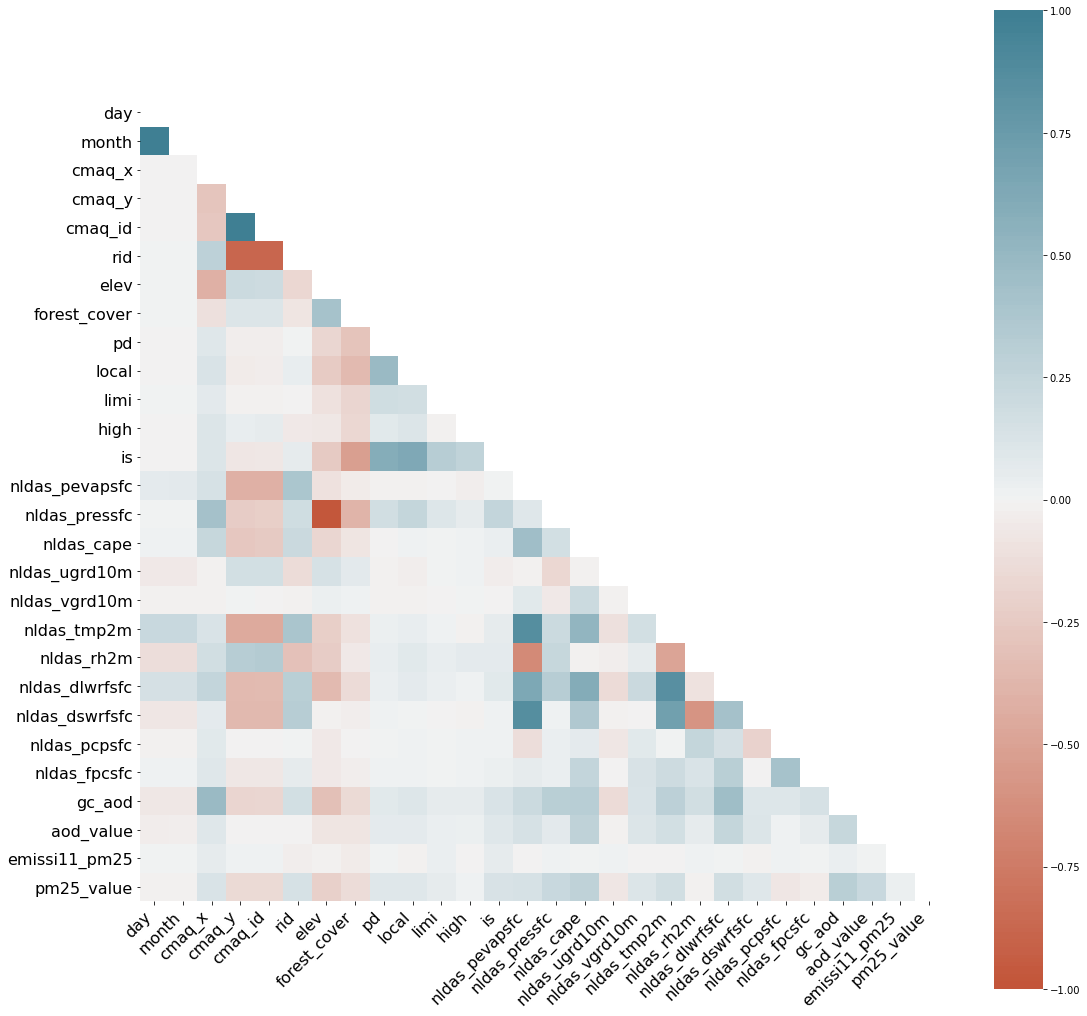

In [98]:
corr_matrix = monitoring_data.corr()

# create a mask for the upper triangle of the correlation matrix
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# plot the heatmap with only the lower triangle of the correlation matrix
fig, axs = plt.subplots(figsize=(18, 18))
ax = sns.heatmap(
    corr_matrix, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    mask=mask
)

ax.set_yticklabels(
    ax.get_yticklabels(),
    fontsize = 16
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    fontsize = 16,
    rotation=45,
    horizontalalignment='right'
);
plt.show()

In [66]:
monitoring_unique_df = monitoring_whole_data.drop_duplicates('cmaq_id')
monitoring_unique_df = monitoring_unique_df.reset_index(drop = True)
monitoring_unique_df

,year,day,cmaq_x,cmaq_y,elev,emissi11_pm25,forest_cover,high,limi,local,...,narr_vgrd1815mb,narr_tmp30m,narr_pres2m,narr_pres10m,narr_pres30m,aod_value,pm25_value,gc_aod,pm25_value_k,month
0,2011,1,-2.256897e+05,3.587932e+05,35.77930,0.0,0.000000,0.000000,0.000000,873.759842,...,0.498815,294.425,101386.0,101282.0,101040.0,0.112333,8.6,0.021297,8.582339,1.0
1,2011,1,1.571739e+06,3.949590e+05,1.01104,0.0,0.000000,1050.015418,0.000000,807.793896,...,2.506630,298.217,101552.0,101482.0,101273.0,NaN,7.9,0.107923,7.383566,1.0
2,2011,1,-1.291484e+05,4.863733e+05,2.43082,0.0,0.000000,0.000000,0.000000,1009.915135,...,0.496211,293.508,101352.0,101282.0,101073.0,0.027000,5.9,0.022637,5.900033,1.0
3,2011,1,1.430635e+06,4.666680e+05,3.87558,0.0,0.000000,0.000000,2030.156665,0.000000,...,3.678500,295.279,97185.8,97082.1,96839.6,NaN,5.4,0.111803,7.488950,1.0
4,2011,1,1.573342e+06,4.646160e+05,3.35600,0.0,0.020202,0.000000,0.000000,2037.573293,...,3.912880,296.529,101586.0,101515.0,101273.0,NaN,10.2,0.100897,7.398404,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1076,2011,300,-7.580717e+05,2.407723e+06,1375.23000,0.0,0.175606,0.000000,0.000000,0.000000,...,-2.035690,291.590,96159.1,96059.0,95859.1,NaN,6.0,0.002993,6.436033,10.0
1077,2011,309,-1.554955e+06,1.524309e+06,1628.55000,0.0,0.919192,0.000000,0.000000,0.000000,...,-2.861860,289.674,86915.8,86817.0,86586.8,NaN,1.5,0.012737,5.295024,11.0
1078,2011,314,-1.962413e+06,1.354858e+06,59.76920,0.0,0.706152,0.000000,0.000000,0.000000,...,3.299710,296.740,101530.0,101392.0,101182.0,NaN,7.9,0.007383,14.143921,11.0
1079,2011,321,-2.247366e+06,2.602283e+06,6.15269,0.0,0.066845,0.000000,0.000000,1383.890730,...,-1.016550,291.354,101569.0,101502.0,101235.0,NaN,4.5,0.098937,11.672241,11.0


<AxesSubplot:>

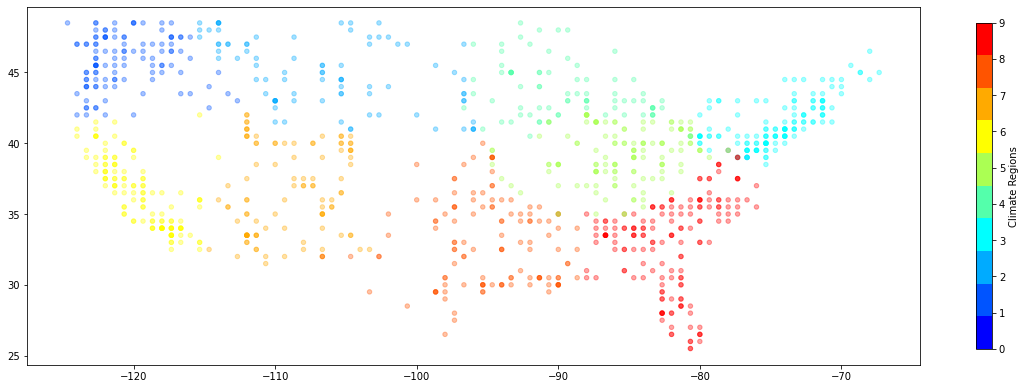

In [83]:
from matplotlib.colors import ListedColormap
from matplotlib import cm
import geopandas as gpd

rid_df = monitoring_unique_df[['lon', 'lat', 'rid']].copy()
rid_df = rid_df.reset_index(drop = True)

fig, axs = plt.subplots(figsize = (20, 20))

rainbow_colors = ListedColormap(['#0000ff', '#0054ff', '#00abff', '#00ffff', '#54ffab', '#abff53', '#ffff00', '#ffaa00', '#ff5400', '#ff0000']) #Using VIBGYOR for colors
color_list = ['#0000ff', '#0054ff', '#00abff', '#00ffff', '#54ffab', '#abff53', '#ffff00', '#ffaa00', '#ff5400', '#ff0000']
rid_map = gpd.GeoDataFrame(rid_df, geometry = gpd.points_from_xy(rid_df.lon, rid_df.lat)) #Create a geodataframe
rid_map.plot(column = 'rid', ax = axs, cmap = rainbow_colors, 
             alpha=0.35, 
             legend = True, legend_kwds = {'label': "Climate Regions", 'shrink': 0.3}, 
             markersize = 20)


In [84]:
whole_data = pd.read_csv("US_data/BigUS/largeUS_pred.csv")
whole_data

,year,day,cmaq_x,cmaq_y,elev,emissi11_pm25,forest_cover,high,limi,local,...,narr_vgrd1815mb,narr_tmp30m,narr_pres2m,narr_pres10m,narr_pres30m,aod_value,pm25_value,gc_aod,pm25_value_k,month
0,2011,1,-1.546318e+05,3.231663e+05,10.23680,0.0,0.039216,0.000000,0.000000,831.897438,...,-3.402230,298.071,98985.8,98882.1,98706.3,NaN,NaN,0.042317,7.278867,1.0
1,2011,1,-1.427332e+05,3.230424e+05,4.38882,0.0,0.007346,0.000000,0.000000,1634.444946,...,-3.402230,298.071,98985.8,98882.1,98706.3,NaN,NaN,0.042317,7.111352,1.0
2,2011,1,-1.783152e+05,3.350347e+05,17.82310,0.0,0.106520,1078.597982,0.000000,306.127464,...,0.222773,294.696,101352.0,101249.0,101040.0,NaN,NaN,0.023270,7.721335,1.0
3,2011,1,-1.664153e+05,3.349110e+05,12.61300,0.0,0.047750,0.000000,0.000000,0.000000,...,0.379023,295.571,101419.0,101315.0,101073.0,NaN,NaN,0.042317,7.491351,1.0
4,2011,1,-1.545156e+05,3.347886e+05,8.23616,0.0,0.211230,0.000000,0.000000,1009.069365,...,0.379023,295.571,101419.0,101315.0,101073.0,NaN,NaN,0.042317,7.282235,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19639550,2011,365,-1.949187e+06,3.151649e+06,20.80090,0.0,0.038567,0.000000,638.847016,1318.192756,...,4.808970,289.203,101356.0,101252.0,101043.0,NaN,NaN,0.028647,11.660047,12.0
19639551,2011,365,-1.937151e+06,3.151584e+06,14.53420,0.0,0.037649,0.000000,0.000000,0.000000,...,4.808970,289.203,101356.0,101252.0,101043.0,NaN,NaN,0.028647,11.575479,12.0
19639552,2011,365,-1.925112e+06,3.151519e+06,20.15010,0.0,0.047237,75.654009,0.000000,0.000000,...,4.808970,289.203,101356.0,101252.0,101043.0,NaN,NaN,0.024560,11.489751,12.0
19639553,2011,365,-1.913073e+06,3.151452e+06,181.00500,0.0,0.853806,0.000000,0.000000,0.000000,...,5.223030,286.370,97089.3,96985.6,96743.3,NaN,NaN,0.024560,11.403044,12.0


In [86]:
whole_unique_df = whole_data.drop_duplicates(subset=['lon', 'lat'])
whole_unique_df = whole_unique_df.reset_index(drop = True)
whole_unique_df

,year,day,cmaq_x,cmaq_y,elev,emissi11_pm25,forest_cover,high,limi,local,...,narr_vgrd1815mb,narr_tmp30m,narr_pres2m,narr_pres10m,narr_pres30m,aod_value,pm25_value,gc_aod,pm25_value_k,month
0,2011,1,-1.546318e+05,3.231663e+05,10.23680,0.0,0.039216,0.000000,0.0,831.897438,...,-3.402230,298.071,98985.8,98882.1,98706.3,NaN,NaN,0.042317,7.278867,1.0
1,2011,1,-1.783152e+05,3.350347e+05,17.82310,0.0,0.106520,1078.597982,0.0,306.127464,...,0.222773,294.696,101352.0,101249.0,101040.0,NaN,NaN,0.023270,7.721335,1.0
2,2011,1,-2.494939e+05,3.590365e+05,51.82280,0.0,0.000000,0.000000,0.0,0.000000,...,0.722773,294.175,101386.0,101282.0,101040.0,NaN,NaN,0.019730,8.447070,1.0
3,2011,1,-2.256897e+05,3.587932e+05,35.77930,0.0,0.000000,0.000000,0.0,873.759842,...,0.498815,294.425,101386.0,101282.0,101040.0,0.112333,8.6,0.021297,8.582339,1.0
4,2011,1,-1.661808e+05,3.581815e+05,9.12141,0.0,0.000000,0.000000,0.0,0.000000,...,-1.915250,296.112,101352.0,101249.0,101040.0,0.145500,NaN,0.039433,7.431259,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2629,2011,1,-1.876660e+06,3.115954e+06,280.88200,0.0,0.750446,0.000000,0.0,0.000000,...,-0.923060,286.008,96852.5,96782.1,96606.3,NaN,NaN,0.000310,14.284680,1.0
2630,2011,1,-2.117447e+06,3.128790e+06,3.56685,0.0,0.100092,0.000000,0.0,0.000000,...,-1.535040,288.654,101352.0,101282.0,101006.0,NaN,1.5,0.006920,14.459023,1.0
2631,2011,1,-1.997123e+06,3.128323e+06,15.28770,0.0,0.131016,0.000000,0.0,1087.532869,...,-0.532435,289.237,101552.0,101449.0,101206.0,NaN,NaN,0.005880,14.372412,1.0
2632,2011,1,-1.924907e+06,3.127979e+06,81.47750,0.0,0.200184,0.000000,0.0,0.000000,...,0.746211,287.071,100419.0,100349.0,100073.0,NaN,NaN,0.001153,14.308072,1.0


In [129]:
source_cmaq = np.load("/Users/shrey/Downloads/PM25/PM25-dnntransfer/US_data/split-data/single/source_cmaq.npy").tolist()
source_df = monitoring_whole_data[monitoring_whole_data['cmaq_id'].isin(source_cmaq)]
source_df = source_df.reset_index()
source_unique_df = source_df.drop_duplicates('cmaq_id')
source_unique_df = source_unique_df.reset_index()
source_unique_df['domain'] = pd.Series(['Source'] * len(source_unique_df))


cmaq_ids = np.load(f"/Users/shrey/Downloads/PM25/PM25-dnntransfer/US_data/split-data/single/tl-cal-10/split-5/target_cmaq.npz")

target_cmaq = cmaq_ids["train"].tolist()
target_df = monitoring_whole_data[monitoring_whole_data['cmaq_id'].isin(target_cmaq)]
target_df = target_df.reset_index()
target_unique_df = target_df.drop_duplicates('cmaq_id')
target_unique_df = target_unique_df.reset_index()
target_unique_df['domain'] = pd.Series(['Target'] * len(target_unique_df))


test_cmaq = cmaq_ids["test"]
test_df = monitoring_whole_data[monitoring_whole_data['cmaq_id'].isin(test_cmaq)]
test_df = test_df.reset_index()
test_unique_df = test_df.drop_duplicates('cmaq_id')
test_unique_df = test_unique_df.reset_index()
test_unique_df['domain'] = pd.Series(['Test'] * len(test_unique_df))

all_domain = result = pd.concat([source_unique_df, target_unique_df, test_unique_df], ignore_index=True)
all_domain = all_domain.drop(['level_0', 'index'], axis=1)
all_domain

,year,day,cmaq_x,cmaq_y,elev,emissi11_pm25,forest_cover,high,limi,local,...,narr_tmp30m,narr_pres2m,narr_pres10m,narr_pres30m,aod_value,pm25_value,gc_aod,pm25_value_k,month,domain
0,2011,1,-2.256897e+05,3.587932e+05,35.77930,0.0,0.000000,0.000000,0.000000,873.759842,...,294.425,101386.0,101282.0,101040.0,0.112333,8.6,0.021297,8.582339,1.0,Source
1,2011,1,1.571739e+06,3.949590e+05,1.01104,0.0,0.000000,1050.015418,0.000000,807.793896,...,298.217,101552.0,101482.0,101273.0,NaN,7.9,0.107923,7.383566,1.0,Source
2,2011,1,-1.291484e+05,4.863733e+05,2.43082,0.0,0.000000,0.000000,0.000000,1009.915135,...,293.508,101352.0,101282.0,101073.0,0.027000,5.9,0.022637,5.900033,1.0,Source
3,2011,1,1.430635e+06,4.666680e+05,3.87558,0.0,0.000000,0.000000,2030.156665,0.000000,...,295.279,97185.8,97082.1,96839.6,NaN,5.4,0.111803,7.488950,1.0,Source
4,2011,1,1.573342e+06,4.646160e+05,3.35600,0.0,0.020202,0.000000,0.000000,2037.573293,...,296.529,101586.0,101515.0,101273.0,NaN,10.2,0.100897,7.398404,1.0,Source
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1076,2011,99,-2.223913e+06,2.081050e+06,220.50700,0.0,0.320478,0.000000,0.000000,1338.076280,...,289.196,99623.5,99523.6,99290.7,0.026600,5.1,0.021033,5.298931,4.0,Test
1077,2011,215,-2.056726e+06,1.838874e+06,956.06500,0.0,0.999082,0.000000,0.000000,0.000000,...,298.137,98761.7,98631.0,98471.1,0.034500,1.5,0.015773,2.480141,8.0,Test
1078,2011,231,-2.223501e+06,2.287531e+06,799.72600,0.0,0.972452,0.000000,0.000000,0.000000,...,293.990,97871.2,97740.6,97548.0,0.110600,4.5,0.014880,4.559859,8.0,Test
1079,2011,288,-1.890476e+06,1.415257e+06,622.76700,0.0,0.126722,0.000000,0.000000,0.000000,...,294.009,92020.7,91947.8,91699.2,0.078000,19.9,0.033230,18.935146,10.0,Test


In [144]:
all_domain[all_domain['domain'] == 'Target']

,year,day,cmaq_x,cmaq_y,elev,emissi11_pm25,forest_cover,high,limi,local,...,narr_pres2m,narr_pres10m,narr_pres30m,aod_value,pm25_value,gc_aod,pm25_value_k,month,domain,geometry
957,2011,1,-2033230.208,1.693317e+06,148.17600,0.0,0.000000,0.0,0.000000,126.190208,...,101019.0,100949.0,100706.0,NaN,8.50,0.005973,15.771408,1.0,Target,POINT (-119.33334 36.00000)
958,2011,1,-2081104.616,1.705274e+06,61.26510,0.0,0.000000,0.0,0.000000,0.000000,...,101252.0,101115.0,100906.0,NaN,13.70,0.005973,16.311198,1.0,Target,POINT (-119.33334 36.00000)
959,2011,1,-2283998.321,2.032100e+06,29.98710,0.0,0.000000,0.0,0.000000,0.000000,...,98452.5,98348.7,98139.6,NaN,5.10,0.031213,16.757066,1.0,Target,POINT (-122.66666 38.50000)
960,2011,1,-2295814.579,2.117076e+06,180.46000,0.0,0.020499,0.0,0.000000,709.718952,...,99319.2,99248.7,99006.3,NaN,5.20,0.023617,16.633382,1.0,Target,POINT (-123.33334 39.00000)
961,2011,3,-1926504.902,1.366953e+06,618.24700,0.0,0.968779,0.0,0.000000,0.000000,...,98764.0,98696.3,98427.5,NaN,6.10,0.020003,6.444887,1.0,Target,POINT (-117.33334 33.50000)
962,2011,3,-1842744.691,1.379088e+06,-7.74652,0.0,0.453654,0.0,1024.002419,1080.306831,...,98330.7,98263.0,98027.5,NaN,4.15,0.019607,6.340249,1.0,Target,POINT (-116.00000 33.50000)
963,2011,3,-1866589.206,1.403208e+06,188.65900,0.0,0.838681,0.0,0.000000,0.000000,...,94464.0,94396.3,94160.8,NaN,2.20,0.012963,6.439143,1.0,Target,POINT (-116.66666 34.00000)
964,2011,3,-2057710.317,1.511599e+06,454.36900,0.0,0.599481,0.0,0.000000,0.000000,...,97830.7,97763.0,97560.8,NaN,3.00,0.015113,5.634550,1.0,Target,POINT (-118.66666 34.50000)
965,2011,6,-1807175.469,1.282671e+06,-24.83780,0.0,0.016934,0.0,0.000000,0.000000,...,101818.0,101651.0,101452.0,0.070333,7.20,0.001960,6.777735,1.0,Target,POINT (-115.33334 33.00000)
966,2011,12,-1997835.875,1.523839e+06,736.93900,0.0,0.024064,0.0,0.000000,137.823173,...,97835.3,97767.3,97531.1,0.028000,8.00,0.002323,7.955758,1.0,Target,POINT (-118.00000 34.50000)


<AxesSubplot:>

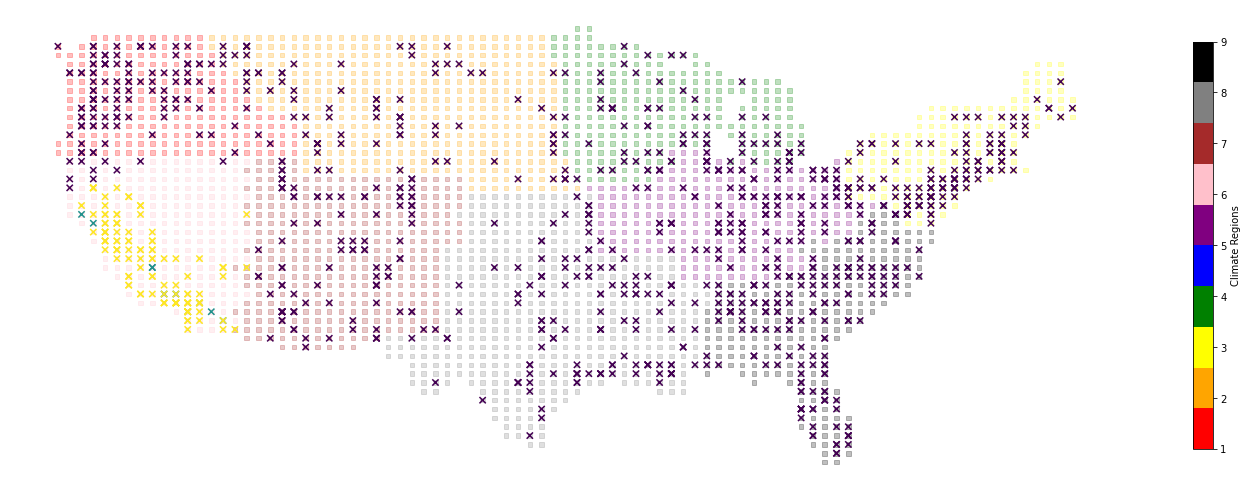

In [145]:
from matplotlib.colors import ListedColormap
from matplotlib import cm
import geopandas as gpd

rid_df = whole_unique_df[['lon', 'lat', 'rid']].copy()
rid_df = rid_df.reset_index(drop = True)

# shapes = gpd.read_file('US_Data/CONUS_ARD_grid/conus_ard_grid.shp')
fig, ax1 = plt.subplots(figsize = (25, 25))

ax1.axis('off')


rainbow_colors = ListedColormap(['#0000ff', '#0054ff', '#00abff', '#00ffff', '#54ffab', '#abff53', '#ffff00', '#ffaa00', '#ff5400', '#ff0000']) #Using VIBGYOR for colors
color_range = ListedColormap(["red", "orange", "yellow", "green", "blue", "purple", "pink", "brown", "gray", "black"])
color_list = ['maroon', 'magenta', '#00abff']

rid_map = gpd.GeoDataFrame(rid_df, geometry = gpd.points_from_xy(rid_df.lon, rid_df.lat)) #Create a geodataframe
rid_map.plot(column = 'rid', ax = ax1, cmap = color_range, 
             alpha=0.25, 
             legend = True, legend_kwds = {'label': "Climate Regions", 'shrink': 0.3},
             marker = "s",
             markersize = 20)

### legend = True, legend_kwds = {'label': "Domain", 'shrink': 0.3},
rid_map = gpd.GeoDataFrame(all_domain, geometry = gpd.points_from_xy(all_domain.lon, all_domain.lat)) #Create a geodataframe
rid_map.plot(column = 'domain', ax = ax1, cmap = "viridis",  
             marker = "x",
             markersize = 40)


In [122]:
source_df

,level_0,index,year,day,cmaq_x,cmaq_y,elev,emissi11_pm25,forest_cover,high,...,narr_tmp30m,narr_pres2m,narr_pres10m,narr_pres30m,aod_value,pm25_value,gc_aod,pm25_value_k,month,domain
0,0,0,2011,1,-2.256897e+05,3.587932e+05,35.77930,0.0,0.000000,0.000000,...,294.425,101386.0,101282.0,101040.0,0.112333,8.6,0.021297,8.582339,1.0,Source
1,1,1,2011,1,1.571739e+06,3.949590e+05,1.01104,0.0,0.000000,1050.015418,...,298.217,101552.0,101482.0,101273.0,NaN,7.9,0.107923,7.383566,1.0,Source
2,2,2,2011,1,-1.291484e+05,4.863733e+05,2.43082,0.0,0.000000,0.000000,...,293.508,101352.0,101282.0,101073.0,0.027000,5.9,0.022637,5.900033,1.0,Source
3,3,3,2011,1,1.430635e+06,4.666680e+05,3.87558,0.0,0.000000,0.000000,...,295.279,97185.8,97082.1,96839.6,NaN,5.4,0.111803,7.488950,1.0,Source
4,4,4,2011,1,1.573342e+06,4.646160e+05,3.35600,0.0,0.020202,0.000000,...,296.529,101586.0,101515.0,101273.0,NaN,10.2,0.100897,7.398404,1.0,Source
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221816,221816,249124,2011,365,-1.900296e+06,3.057078e+06,595.92000,0.0,0.970588,0.000000,...,290.432,100123.0,99985.6,99776.6,NaN,4.7,0.016803,10.765756,12.0,Source
221817,221817,249125,2011,365,-1.791970e+06,3.056591e+06,758.28300,0.0,0.778547,0.000000,...,288.057,96756.0,96652.2,96410.0,NaN,9.9,0.007157,9.456686,12.0,Source
221818,221818,249126,2011,365,-1.948693e+06,3.092715e+06,3.58333,0.0,0.004456,0.000000,...,288.724,102023.0,101886.0,101677.0,NaN,3.9,0.032277,11.428495,12.0,Source
221819,221819,249127,2011,365,-2.117447e+06,3.128790e+06,3.56685,0.0,0.100092,0.000000,...,290.349,102189.0,102019.0,101843.0,NaN,2.7,0.018143,12.663332,12.0,Source


In [97]:
shape = gpd.read_file('US_data/climate_divisions_shapefile/OFFICIAL_CLIM_DIVISIONS.shp')
shape.plot()

DriverError: Unable to open US_data/climate_divisions_shapefile/OFFICIAL_CLIM_DIVISIONS.shx or US_data/climate_divisions_shapefile/OFFICIAL_CLIM_DIVISIONS.SHX. Set SHAPE_RESTORE_SHX config option to YES to restore or create it.

ValueError: The condensed distance matrix must contain only finite values.

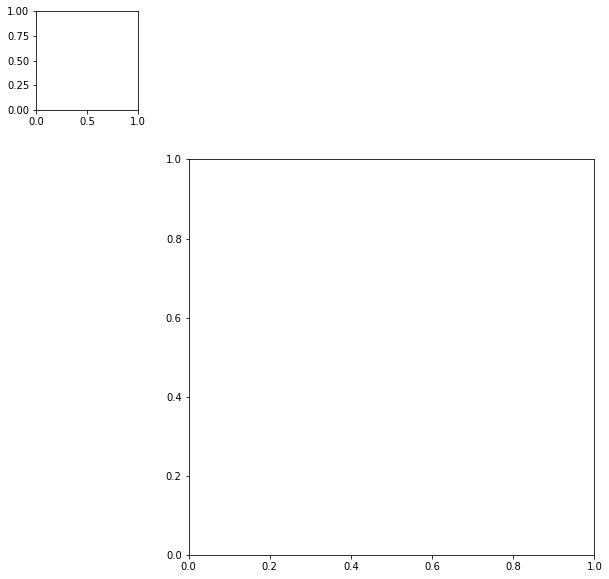

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

### method = 'complete', annot  = True, annot_kws = {'size': 8}
map_entropy = sns.clustermap(monitoring_data.corr(method=entropy), 
                   cmap   = 'RdBu')
plt.setp(map_entropy.ax_heatmap.get_xticklabels(), rotation=60);

In [70]:
train_df = monitoring_whole_data[monitoring_whole_data['cmaq_id'].isin(train_cmaq)]
train_df

,year,day,cmaq_x,cmaq_y,elev,emissi11_pm25,forest_cover,high,limi,local,...,narr_vgrd1815mb,narr_tmp30m,narr_pres2m,narr_pres10m,narr_pres30m,aod_value,pm25_value,gc_aod,pm25_value_k,month
209,2011,1,-1925338.679,1.717911e+06,1133.3800,0.0,0.145087,0.0,0.000000,1121.890457,...,0.798294,287.529,86285.8,86182.1,85973.0,NaN,3.40,0.001653,13.856649,1.0
212,2011,1,-2128950.371,1.729344e+06,129.9470,0.0,0.000000,0.0,0.000000,0.000000,...,0.777461,292.883,88985.8,88882.1,88706.3,NaN,8.60,0.011530,16.665812,1.0
248,2011,1,-2200323.319,1.923234e+06,216.2680,0.0,0.037433,0.0,0.000000,0.000000,...,6.985790,288.362,84252.5,84182.1,84006.3,NaN,6.85,0.014870,16.733900,1.0
688,2011,2,-1902439.247,1.415243e+06,706.8810,0.0,0.003673,0.0,0.000000,242.600175,...,-2.580050,293.896,97715.4,97647.4,97411.0,NaN,9.30,0.007490,5.249139,1.0
751,2011,2,-1925338.679,1.717911e+06,1133.3800,0.0,0.145087,0.0,0.000000,1121.890457,...,0.271510,287.063,86282.1,86180.7,85977.7,NaN,3.80,0.008363,5.242625,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248694,2011,365,-1938650.736,1.294668e+06,208.0920,0.0,0.005348,0.0,0.000000,1381.666212,...,-0.560827,293.057,99956.0,99818.9,99610.0,0.095,38.70,0.010383,37.964905,12.0
248786,2011,365,-2201031.155,1.644213e+06,78.1021,0.0,0.151515,0.0,638.020294,586.044266,...,-1.362910,296.182,101256.0,101119.0,100910.0,NaN,12.00,0.005153,22.880376,12.0
248795,2011,365,-1925338.679,1.717911e+06,1133.3800,0.0,0.145087,0.0,0.000000,1121.890457,...,-0.769160,289.891,86389.3,86318.9,86110.0,NaN,4.30,0.000233,22.785039,12.0
248798,2011,365,-2128950.371,1.729344e+06,129.9470,0.0,0.000000,0.0,0.000000,0.000000,...,-0.954056,292.099,89056.0,88952.2,88743.3,NaN,22.20,0.007037,19.918247,12.0


In [72]:
df_A = pd.DataFrame({"A": [1, 2], "B": [3, 4]})
df_A

,A,B
0,1,3
1,2,4


In [73]:
np_A = df_A.to_numpy()
np_A

array([[1, 3],
       [2, 4]])

In [2]:
tag_names = ['day', 'month', 'cmaq_x', 'cmaq_y', 'cmaq_id', 'rid', 'elev', 'forest_cover', 'pd', 'local', 'limi', 'high', 'is',
    'nldas_pevapsfc','nldas_pressfc', 'nldas_cape', 'nldas_ugrd10m', 'nldas_vgrd10m', 'nldas_tmp2m', 'nldas_rh2m', 'nldas_dlwrfsfc',
    'nldas_dswrfsfc', 'nldas_pcpsfc', 'nldas_fpcsfc', 'gc_aod', 'aod_value', 'emissi11_pm25', 'pm25_value_k', 'pm25_value']

monitoring_df = pd.read_csv("US_data/BigUS/us_monitoring.csv")[tag_names]

source_cmaq = np.load("US_data/split-data/single/source_cmaq.npy")
source_df = monitoring_df[monitoring_df['cmaq_id'].isin(source_cmaq)]
source_df = source_df.reset_index()
source_df

,index,day,month,cmaq_x,cmaq_y,cmaq_id,rid,elev,forest_cover,pd,...,nldas_rh2m,nldas_dlwrfsfc,nldas_dswrfsfc,nldas_pcpsfc,nldas_fpcsfc,gc_aod,aod_value,emissi11_pm25,pm25_value_k,pm25_value
0,0,1,1.0,-2.256897e+05,3.587932e+05,20641,8,35.77930,0.000000,1738.142952,...,46.4560,361.171,363.8740,0.000000,0.000000,0.021297,0.112333,0.0,8.582339,8.6
1,1,1,1.0,1.571739e+06,3.949590e+05,23012,9,1.01104,0.000000,49.834835,...,73.5162,364.283,567.1650,0.000000,0.000000,0.107923,NaN,0.0,7.383566,7.9
2,2,1,1.0,-1.291484e+05,4.863733e+05,25533,8,2.43082,0.000000,2.177096,...,59.1854,313.827,482.5620,0.000000,0.000000,0.022637,0.027000,0.0,5.900033,5.9
3,3,1,1.0,1.430635e+06,4.666680e+05,25664,9,3.87558,0.000000,223.291218,...,63.8325,355.794,540.0590,0.000000,0.000000,0.111803,NaN,0.0,7.488950,5.4
4,4,1,1.0,1.573342e+06,4.646160e+05,25676,9,3.35600,0.020202,458.641023,...,67.4090,360.210,549.9930,0.000000,0.000000,0.100897,NaN,0.0,7.398404,10.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221816,249124,365,12.0,-1.900296e+06,3.057078e+06,119956,1,595.92000,0.970588,1.809363,...,82.1681,273.349,85.9857,0.002386,0.000000,0.016803,NaN,0.0,10.765756,4.7
221817,249125,365,12.0,-1.791970e+06,3.056591e+06,119965,1,758.28300,0.778547,0.580178,...,66.8160,241.386,126.5820,0.000557,0.000000,0.007157,NaN,0.0,9.456686,9.9
221818,249126,365,12.0,-1.948693e+06,3.092715e+06,121284,1,3.58333,0.004456,37.418241,...,73.5161,299.983,84.3423,0.036857,0.238114,0.032277,NaN,0.0,11.428495,3.9
221819,249127,365,12.0,-2.117447e+06,3.128790e+06,122602,1,3.56685,0.100092,0.000000,...,77.9469,288.923,118.1230,0.032857,0.064371,0.018143,NaN,0.0,12.663332,2.7


In [3]:
source_df.isna().sum()

index                  0
day                    0
month                  0
cmaq_x                 0
cmaq_y                 0
cmaq_id                0
rid                    0
elev                   0
forest_cover           0
pd                     0
local                  0
limi                   0
high                   0
is                     0
nldas_pevapsfc         0
nldas_pressfc          0
nldas_cape             0
nldas_ugrd10m          0
nldas_vgrd10m          0
nldas_tmp2m            0
nldas_rh2m             0
nldas_dlwrfsfc         0
nldas_dswrfsfc         0
nldas_pcpsfc           0
nldas_fpcsfc           0
gc_aod                 0
aod_value         163279
emissi11_pm25          0
pm25_value_k           0
pm25_value             0
dtype: int64

In [11]:
Xs = source_df.drop(columns=["pm25_value"]).to_numpy()
Xs = np.nan_to_num(Xs)
ys = source_df["pm25_value"]
ys = np.nan_to_num(ys)

np.any(np.isnan(Xs))

False

In [4]:
cmaq_ids = np.load(f"US_data/split-data/single/tl-cal-5/split-5/target_cmaq.npz")
train_cmaq = cmaq_ids["train"]
target_df = monitoring_df[monitoring_df['cmaq_id'].isin(train_cmaq)]
target_df = target_df.reset_index()
target_df.isna().sum()

index               0
day                 0
month               0
cmaq_x              0
cmaq_y              0
cmaq_id             0
rid                 0
elev                0
forest_cover        0
pd                  0
local               0
limi                0
high                0
is                  0
nldas_pevapsfc      0
nldas_pressfc       0
nldas_cape          0
nldas_ugrd10m       0
nldas_vgrd10m       0
nldas_tmp2m         0
nldas_rh2m          0
nldas_dlwrfsfc      0
nldas_dswrfsfc      0
nldas_pcpsfc        0
nldas_fpcsfc        0
gc_aod              0
aod_value         474
emissi11_pm25       0
pm25_value_k        0
pm25_value          0
dtype: int64

In [7]:
import sklearn.datasets as datasets

Xs, ys = datasets.make_regression(n_samples=1000, n_features=20, n_informative=10, noise=0.1, random_state=1)
Xt, yt = datasets.make_regression(n_samples=500, n_features=20, n_informative=8, noise=0.2, random_state=2)
print(Xs.shape, Xt.shape)
print(type(Xs))

(1000, 20) (500, 20)
<class 'numpy.ndarray'>


In [31]:
print("Hello")

Hello


In [32]:
whole_data = pd.read_csv("US_data/BigUS/largeUS_pred.csv")
whole_data

,year,day,cmaq_x,cmaq_y,elev,emissi11_pm25,forest_cover,high,limi,local,...,narr_vgrd1815mb,narr_tmp30m,narr_pres2m,narr_pres10m,narr_pres30m,aod_value,pm25_value,gc_aod,pm25_value_k,month
0,2011,1,-1.546318e+05,3.231663e+05,10.23680,0.0,0.039216,0.000000,0.000000,831.897438,...,-3.402230,298.071,98985.8,98882.1,98706.3,NaN,NaN,0.042317,7.278867,1.0
1,2011,1,-1.427332e+05,3.230424e+05,4.38882,0.0,0.007346,0.000000,0.000000,1634.444946,...,-3.402230,298.071,98985.8,98882.1,98706.3,NaN,NaN,0.042317,7.111352,1.0
2,2011,1,-1.783152e+05,3.350347e+05,17.82310,0.0,0.106520,1078.597982,0.000000,306.127464,...,0.222773,294.696,101352.0,101249.0,101040.0,NaN,NaN,0.023270,7.721335,1.0
3,2011,1,-1.664153e+05,3.349110e+05,12.61300,0.0,0.047750,0.000000,0.000000,0.000000,...,0.379023,295.571,101419.0,101315.0,101073.0,NaN,NaN,0.042317,7.491351,1.0
4,2011,1,-1.545156e+05,3.347886e+05,8.23616,0.0,0.211230,0.000000,0.000000,1009.069365,...,0.379023,295.571,101419.0,101315.0,101073.0,NaN,NaN,0.042317,7.282235,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19639550,2011,365,-1.949187e+06,3.151649e+06,20.80090,0.0,0.038567,0.000000,638.847016,1318.192756,...,4.808970,289.203,101356.0,101252.0,101043.0,NaN,NaN,0.028647,11.660047,12.0
19639551,2011,365,-1.937151e+06,3.151584e+06,14.53420,0.0,0.037649,0.000000,0.000000,0.000000,...,4.808970,289.203,101356.0,101252.0,101043.0,NaN,NaN,0.028647,11.575479,12.0
19639552,2011,365,-1.925112e+06,3.151519e+06,20.15010,0.0,0.047237,75.654009,0.000000,0.000000,...,4.808970,289.203,101356.0,101252.0,101043.0,NaN,NaN,0.024560,11.489751,12.0
19639553,2011,365,-1.913073e+06,3.151452e+06,181.00500,0.0,0.853806,0.000000,0.000000,0.000000,...,5.223030,286.370,97089.3,96985.6,96743.3,NaN,NaN,0.024560,11.403044,12.0


In [13]:
whole_data.isna().sum()

Unnamed: 0             0
year                   0
day                    0
cmaq_x                 0
cmaq_y                 0
                  ...   
aod_value       13374504
pm25_value      19390426
gc_aod                 0
pm25_value_k           0
month                  0
Length: 79, dtype: int64

In [41]:
tag_names = ['day', 'month', 'cmaq_x', 'cmaq_y', 'cmaq_id', 'rid', 'lat', 'lon', 'elev', 'forest_cover', 'pd', 'local', 'limi', 'high', 'is',
    'nldas_pevapsfc','nldas_pressfc', 'nldas_cape', 'nldas_ugrd10m', 'nldas_vgrd10m', 'nldas_tmp2m', 'nldas_rh2m', 'nldas_dlwrfsfc',
    'nldas_dswrfsfc', 'nldas_pcpsfc', 'nldas_fpcsfc', 'gc_aod', 'aod_value', 'emissi11_pm25', 'pm25_value']

In [42]:
monitoring_data = pd.read_csv("US_data/BigUS/us_monitoring.csv")[tag_names]
monitoring_data.shape

(249129, 30)

In [19]:
da_samples = []

for day_val in range(1,366):
    samples = len(monitoring_data[monitoring_data['day'] == day_val])
    da_samples.append(samples)    

In [21]:
import statistics

statistics.mean(da_samples)

682.5452054794521

In [24]:
cal_df = monitoring_data[monitoring_data['rid'] == 6]
cal_df = cal_df.reset_index(drop = True)

In [25]:
cal_df

,day,month,cmaq_x,cmaq_y,cmaq_id,rid,elev,forest_cover,pd,local,...,nldas_tmp2m,nldas_rh2m,nldas_dlwrfsfc,nldas_dswrfsfc,nldas_pcpsfc,nldas_fpcsfc,gc_aod,aod_value,emissi11_pm25,pm25_value
0,1,1.0,-1950633.194,1.282630e+06,54684,6,12.8137,0.000000,2439.502188,2714.158310,...,285.089,48.0380,267.967,409.465,0.0,0.0,0.010737,0.051,0.0000,14.200
1,1,1.0,-1938560.545,1.330787e+06,56461,6,202.0310,0.000000,4013.915122,3154.448199,...,283.767,46.9682,258.316,369.494,0.0,0.0,0.007203,NaN,0.0000,69.850
2,1,1.0,-1938496.481,1.354885e+06,57349,6,297.8150,0.689624,25.488048,0.000000,...,283.924,50.5019,258.899,366.484,0.0,0.0,0.003947,NaN,0.0000,7.700
3,1,1.0,-1950323.911,1.403110e+06,59124,6,472.9670,0.432507,342.411453,0.000000,...,280.131,47.2153,243.597,355.407,0.0,0.0,0.003947,NaN,0.0000,7.300
4,1,1.0,-2022033.538,1.427128e+06,60006,6,11.4062,0.000000,7613.035229,4223.044032,...,285.574,51.8162,274.311,370.075,0.0,0.0,0.009053,NaN,0.2428,22.775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27786,365,12.0,-2223912.932,2.081050e+06,83965,6,220.5070,0.320478,6.354079,1338.076280,...,283.499,59.5339,263.777,266.895,0.0,0.0,0.002850,0.006,0.0000,8.700
27787,365,12.0,-2163933.420,2.081376e+06,83970,6,19.4007,0.000000,740.990998,3686.369892,...,284.403,67.1406,270.603,272.187,0.0,0.0,0.002217,0.045,0.0000,19.000
27788,365,12.0,-2007987.712,2.082094e+06,83983,6,1378.7600,0.011938,1220.778085,1612.169149,...,274.799,70.7591,214.919,269.860,0.0,0.0,0.002507,0.018,0.0000,5.700
27789,365,12.0,-2187623.382,2.214881e+06,88852,6,106.4680,0.206774,19.151483,812.480945,...,281.307,65.6863,263.789,262.187,0.0,0.0,0.000777,NaN,0.0000,10.100


In [26]:
cal_df_y = cal_df["pm25_value"]
cal_df_x = cal_df.drop(columns=["pm25_value"])

In [28]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(cal_df_x, cal_df_y, test_size=0.9, random_state=42)

In [30]:
train_x = np.nan_to_num(train_x)
test_x = np.nan_to_num(test_x)

In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error


# Define the hyperparameter space for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'max_features': ['sqrt', 'log2']
}

model_rf = RandomForestRegressor(n_estimators=100, max_depth= None, min_samples_split= 2, min_samples_leaf= 1)
model_rf.fit(train_x, train_y)

pred_rf = model_rf.predict(test_x)

r2_correlation_rf = pearsonr(test_y, pred_rf)
r2_corr_rf = (r2_correlation_rf[0])**2

r2_rf = r2_score(test_y, pred_rf)
rmse_rf = sqrt(mean_squared_error(test_y, pred_rf))
mae_rf = mean_absolute_error(test_y, pred_rf)

In [33]:
r2_corr_rf, r2_rf, rmse_rf, mae_rf

(0.6041426010814027, 0.6014892559439824, 5.356831141803794, 3.404225381388533)

In [43]:
east_coast_df = monitoring_data[monitoring_data['rid'].isin([3,5,9])]
east_coast_df = east_coast_df.reset_index(drop = True)

In [50]:
east_coast_df['rid'].unique()

array([9, 5, 3])

<Axes: >

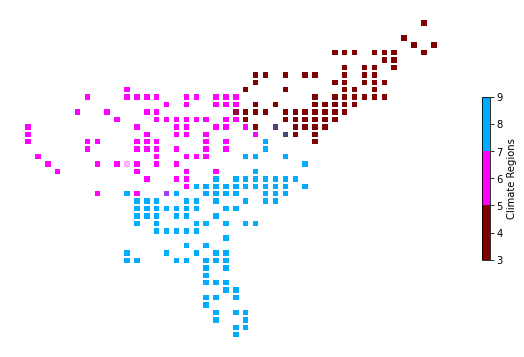

In [49]:
from matplotlib.colors import ListedColormap
from matplotlib import cm
import geopandas as gpd

rid_df = east_coast_df[['lon', 'lat', 'rid']].copy()
rid_df = rid_df.reset_index(drop = True)

fig, ax1 = plt.subplots(figsize = (10, 10))

ax1.axis('off')


rainbow_colors = ListedColormap(['#0000ff', '#0054ff', '#00abff', '#00ffff', '#54ffab', '#abff53', '#ffff00', '#ffaa00', '#ff5400', '#ff0000']) #Using VIBGYOR for colors
color_range = ListedColormap(["red", "orange", "yellow", "green", "blue", "purple", "pink", "brown", "gray", "black"])
color_list = ListedColormap(['maroon', 'magenta', '#00abff'])

rid_map = gpd.GeoDataFrame(rid_df, geometry = gpd.points_from_xy(rid_df.lon, rid_df.lat)) 
rid_map.plot(column = 'rid', ax = ax1, cmap = color_list, 
             alpha=0.25, 
             legend = True, legend_kwds = {'label': "Climate Regions", 'shrink': 0.3},
             marker = "s",
             markersize = 20)


In [ ]:
###################### splitting data by day ##########################

In [52]:
tag_names = ['day', 'month', 'cmaq_x', 'cmaq_y', 'cmaq_id', 'rid', 'lat', 'lon', 'elev', 'forest_cover', 'pd', 'local', 'limi', 'high', 'is',
    'nldas_pevapsfc','nldas_pressfc', 'nldas_cape', 'nldas_ugrd10m', 'nldas_vgrd10m', 'nldas_tmp2m', 'nldas_rh2m', 'nldas_dlwrfsfc',
    'nldas_dswrfsfc', 'nldas_pcpsfc', 'nldas_fpcsfc', 'gc_aod', 'aod_value', 'emissi11_pm25', 'pm25_value']

In [53]:
monitoring_data = pd.read_csv("US_data/BigUS/us_monitoring.csv")[tag_names]
monitoring_data.shape

(249129, 30)

In [59]:
for day in range(1,366):
    day_df = monitoring_data[monitoring_data['day'] == day]
    day_df.to_csv('US_data/split-data/split-by-day/mn-data-%s.csv.gz' %day, compression='gzip')

In [60]:
day_df = pd.read_csv('US_data/split-data/split-by-day/mn-data-1.csv.gz', compression='gzip')
day_df

,Unnamed: 0,day,month,cmaq_x,cmaq_y,cmaq_id,rid,lat,lon,elev,...,nldas_tmp2m,nldas_rh2m,nldas_dlwrfsfc,nldas_dswrfsfc,nldas_pcpsfc,nldas_fpcsfc,gc_aod,aod_value,emissi11_pm25,pm25_value
0,0,1,1.0,-2.256897e+05,3.587932e+05,20641,8,26.5,-98.00000,35.77930,...,293.014,46.4560,361.171,363.874,0.0,0.0,0.021297,0.112333,0.0,8.6
1,1,1,1.0,1.571739e+06,3.949590e+05,23012,9,25.5,-80.66666,1.01104,...,297.414,73.5162,364.283,567.165,0.0,0.0,0.107923,NaN,0.0,7.9
2,2,1,1.0,-1.291484e+05,4.863733e+05,25533,8,27.5,-97.33334,2.43082,...,290.363,59.1854,313.827,482.562,0.0,0.0,0.022637,0.027000,0.0,5.9
3,3,1,1.0,1.430635e+06,4.666680e+05,25664,9,26.5,-82.00000,3.87558,...,297.626,63.8325,355.794,540.059,0.0,0.0,0.111803,NaN,0.0,5.4
4,4,1,1.0,1.573342e+06,4.646160e+05,25676,9,26.0,-80.66666,3.35600,...,297.703,67.4090,360.210,549.993,0.0,0.0,0.100897,NaN,0.0,10.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,535,1,1.0,-1.900296e+06,3.057078e+06,119956,1,48.0,-121.33334,595.92000,...,267.131,64.3500,196.397,218.086,0.0,0.0,0.000733,NaN,0.0,54.2
536,536,1,1.0,-1.791970e+06,3.056591e+06,119965,1,48.5,-120.00000,758.28300,...,267.466,75.7193,210.797,154.271,0.0,0.0,0.002117,NaN,0.0,12.3
537,537,1,1.0,-1.948693e+06,3.092715e+06,121284,1,48.5,-122.66666,3.58333,...,274.494,74.0730,223.977,151.874,0.0,0.0,0.004000,NaN,0.0,11.6
538,538,1,1.0,-2.117447e+06,3.128790e+06,122602,1,48.5,-124.66666,3.56685,...,274.896,68.0969,219.996,177.286,0.0,0.0,0.006920,NaN,0.0,1.5
